# Numerical Integration of Functions

## Introduction

### Importance of Integration in Physics

Integration is foundational in physics, as many physical systems are described by differential equations that represent dynamic behaviors.
For instance, Newton's second law, $f = m a = m d^2 x/d t^2$, is an ordinary differential equation (ODE) that models the acceleration of a mass under a force.
When physical phenomena are modeled as continuous fields, we often move to partial differential equations (PDEs), such as those governing fluid dynamics, electromagnetism, and quantum fields.

To predict the behavior of these systems, we frequently need to integrate these differential equations, either over time, space, or other domains.
Analytical solutions, though ideal, are rarely feasible for real-world problems due to the complex nature of the equations and boundary conditions.
This makes numerical integration essential for approximating solutions in computational physics, enabling us to simulate and analyze physical systems that defy closed-form solutions.

### Numerical Integration of Functions

Before diving into the numerical methods for solving complex differential equations, we start with a simpler, yet essential case: the numerical evaluation of a definite integral, represented as
\begin{align}
I = \int_a^b f(x) \, dx.
\end{align}
In many ways, this task is a special case of solving an initial-value problem for an ODE.
Specifically, computing the integral $I$ is equivalent to solving the differential equation $d y/d x = f(x)$, with a boundary condition $y(a) = 0$, and evaluating $y(b)$.
This perspective connects integration directly to the broader framework of solving differential equations.

By focusing first on the numerical integration of functions, we will see the key concept of convergence---the manner in which a numerical approximation approaches the true value as computational parameters (like step size) are refined.
This foundation will prepare us for tackling more general ODEs and PDEs, where convergence and error control are critical for obtaining reliable solutions.

### Analytical Example

Numerical integration is a key tool for solving problems without analytical solutions.
However, to build our understanding, let's start with a function that does have a known solution.
This approach allows us to test and validate our algorithms and implementations.

Consider the function $f(x) = e^x$.
Its indefinite integral is:
\begin{align}
\int f(x) \, dx = e^x + C
\end{align}
where $C$ is the constant of integration.
For a definite integral over the interval $[a, b]$, we have:
\begin{align}
\int_a^b f(x) \, dx = e^b - e^a
\end{align}

Below, we plot this function over the interval $[0, 1]$ for visualization.

^C


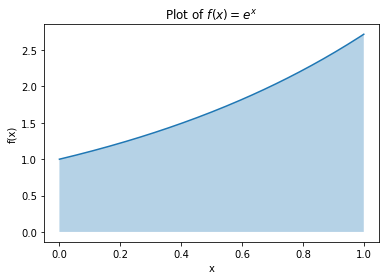

  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3


In [2]:
# Importing necessary libraries
import numpy as np
from matplotlib import pyplot as plt

# Define the function
def f(x):
    return np.exp(x)

# Define a fine grid for plotting
x = np.linspace(0, 1, 129)
y = f(x)

# Plotting the function 
plt.plot(x, y)
plt.fill_between(x, y, alpha=0.33)
plt.title(r'Plot of $f(x) = e^x$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

### Riemann Sums

The Riemann sum is a foundational approach to numerical integration.
It approximates the area under a curve by summing up the values of the function at specific points across the interval, multiplied by the width of each sub-interval.

A general Riemann sum for an interval $[a, b]$ is given by:
\begin{align}
I \approx S = \sum_{i=1}^n f(x_i^*) \Delta x_i
\end{align}
where $\Delta x_i = x_i - x_{i-1}$ is the width of each sub-interval.

There are different types of Riemann sums:

- **Left Riemann Sum**: $x_i^* = x_{i-1}$
- **Right Riemann Sum**: $x_i^* = x_i$
- **Middle Riemann Sum**: $x_i^* = \frac{x_{i-1} + x_i}{2}$

As $\Delta x_i \rightarrow 0$, these sums converge to the exact integral.

Below, we visualize each type of Riemann sum for $f(x) = e^x$ on a coarse grid over the interval $[0, 1]$.

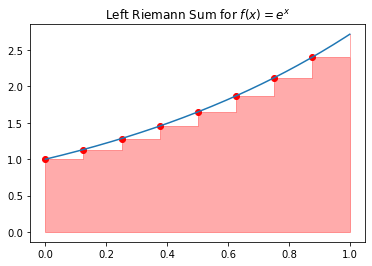

In [3]:
# Define a coarse grid for visualization
X = np.linspace(0, 1, 9)
Y = f(X)

# Plot Left Riemann Sum
plt.plot(x, y)
plt.scatter(X[:-1], Y[:-1], color='r')
plt.fill_between(X, Y, step='post', color='r', alpha=0.33)
plt.title('Left Riemann Sum for $f(x) = e^x$')
plt.show()

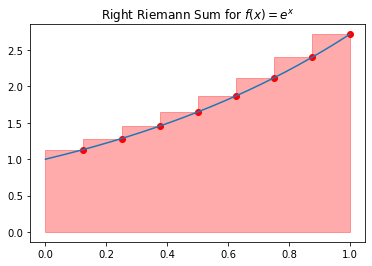

In [5]:
# Plot Right Riemann Sum
plt.plot(x, y)
plt.scatter(X[1:], Y[1:], color='r')
plt.fill_between(X, Y, step='pre', color='r', alpha=0.33)
plt.title('Right Riemann Sum for $f(x) = e^x$')
plt.show()

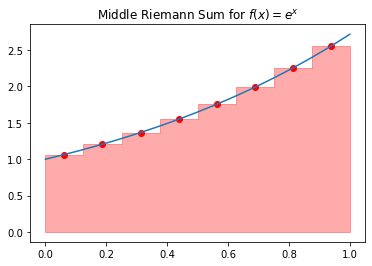

In [4]:
# Plot Middle Riemann Sum
X_mid = 0.5 * (X[:-1] + X[1:])
Y_mid = f(X_mid)

plt.plot(x, y)
plt.scatter(X_mid, Y_mid, color='r')
plt.fill_between(np.concatenate([[0], X_mid, [1]]),
                 np.concatenate([Y_mid[:1], Y_mid, Y_mid[-1:]]),
                 step='mid', color='r', alpha=0.33)
plt.title('Middle Riemann Sum for $f(x) = e^x$')
plt.show()

### Computing Riemann Sums

Let's now compute each Riemann sum numerically and compare it with the exact solution.

In [6]:
# Left Riemann Sum calculation
N = 8
D = 1 / N
X_left = [D * i for i in range(N)]
S_left = np.sum(f(X_left) * D)

print('Left Riemann Sum:', S_left)

# Exact solution
I = f(1) - f(0)
print('Analytical solution:', I)

# Error analysis
aerr_left = abs(I - S_left)
rerr_left = abs((I - S_left) / I)
print('Absolute error:', aerr_left)
print(f'Relative error: {100 * rerr_left:.2f} %')

Left Riemann Sum: 1.6131259778856117
Analytical solution: 1.718281828459045
Absolute error: 0.10515585057343335
Relative error: 6.12 %


In [7]:
# Right Riemann Sum calculation
X_right = [D * (i + 1) for i in range(N)]
S_right = np.sum(f(X_right) * D)

print('Right Riemann Sum:', S_right)

# Error analysis
aerr_right = abs(I - S_right)
rerr_right = abs((I - S_right) / I)
print('Absolute error:', aerr_right)
print(f'Relative error: {100 * rerr_right:.2f} %')

Right Riemann Sum: 1.827911206442992
Absolute error: 0.10962937798394701
Relative error: 6.38 %


In [8]:
# Middle Riemann Sum calculation
X_mid = [D * (i + 0.5) for i in range(N)]
S_mid = np.sum(f(X_mid) * D)

print('Middle Riemann Sum:', S_mid)

# Error analysis
aerr_mid = abs(I - S_mid)
rerr_mid = abs((I - S_mid) / I)
print('Absolute error:', aerr_mid)
print(f'Relative error: {100 * rerr_mid:.2f} %')

Middle Riemann Sum: 1.717163664995687
Absolute error: 0.001118163463358135
Relative error: 0.07 %


By calculating and visualizing the left, right, and middle Riemann sums, we see how each approximation compares to the exact integral.
The middle Riemann sum often provides a more accurate result, demonstrating that even small changes in the method can impact accuracy.
This understanding of Riemann sums lays the groundwork for more advanced numerical integration techniques that we will explore next.

### Convergence of Riemann Sums

In numerical integration, convergence describes how closely a numerical approximation approaches the exact value of an integral as the number of sample points increases.
To illustrate convergence, we'll analyze the errors in different types of Riemann sums (left, right, and middle) as we increase the number of sampling points.

To streamline our calculations, let's define a function `RiemannSum()` that allows us to compute the Riemann sum for any function $f$ using different sample points (left, right, or middle) and varying the number of intervals.

In [9]:
# General function for Riemann sum calculation
def RiemannSum(f, N=8, a=0, b=1, t='mid'):
    """Compute Riemann sum for function `f` from `a` to `b` using `N` points.

    Parameters:
    - `t`: type of Riemann sum, can be `mid` (middle), `left`, or `right`.
    """
    D = (b - a) / N  # Step size
    if t[0] == 'l':
        X = [D * i + a for i in range(N)]
    elif t[0] == 'r':
        X = [D * (i + 1) + a for i in range(N)]
    else:
        X = [D * (i + 0.5) + a for i in range(N)]
    return np.sum(f(np.array(X))) * D

We'll use varying numbers of sampling points $N$ and compute the absolute error for each Riemann sum type compared to the true integral value.
Below, we test this with the function $f(x) = e^x$.

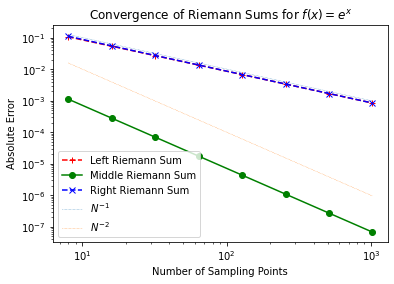

In [10]:
# Define range of sampling points
Ns = np.array([8, 16, 32, 64, 128, 256, 512, 1024])

# True value of the integral for comparison
I = np.exp(1) - 1

# Calculate errors for left, middle, and right Riemann sums
err_l = [abs(RiemannSum(f, N, t='l') - I) for N in Ns]
err_m = [abs(RiemannSum(f, N, t='m') - I) for N in Ns]
err_r = [abs(RiemannSum(f, N, t='r') - I) for N in Ns]

# Plotting the convergence results
plt.loglog(Ns, err_l, '+--', color='r', label='Left Riemann Sum')
plt.loglog(Ns, err_m, 'o-',  color='g', label='Middle Riemann Sum')
plt.loglog(Ns, err_r, 'x--', color='b', label='Right Riemann Sum')
plt.loglog(Ns, Ns**(-1.0), ':', lw=0.5, label=r'$N^{-1}$')
plt.loglog(Ns, Ns**(-2.0), ':', lw=0.5, label=r'$N^{-2}$')
plt.xlabel('Number of Sampling Points')
plt.ylabel('Absolute Error')
plt.legend()
plt.title('Convergence of Riemann Sums for $f(x) = e^x$')
plt.show()

Observing the plot, we note that the error in the middle Riemann sum decreases more rapidly than the errors for the left and right sums.
Even with fewer points, the middle Riemann sum achieves comparable accuracy to the left and right sums with significantly more points.

### Testing Convergence with Different Functions

To determine if this trend holds generally, let’s repeat the convergence test with different functions: a half-cycle of $\sin(x)$ and a quarter circle $\sqrt{1 - x^2}$.

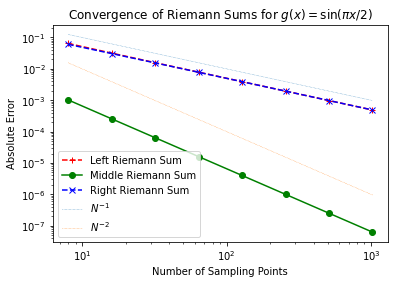

In [11]:
# Define a half-cycle of sin(x)
def g(x):
    return np.sin(x * np.pi / 2)

# Calculate errors for each Riemann sum type
err_l = [abs(RiemannSum(g, N, t='l') - 2 / np.pi) for N in Ns]
err_m = [abs(RiemannSum(g, N, t='m') - 2 / np.pi) for N in Ns]
err_r = [abs(RiemannSum(g, N, t='r') - 2 / np.pi) for N in Ns]

# Plotting the convergence results
plt.loglog(Ns, err_l, '+--', color='r', label='Left Riemann Sum')
plt.loglog(Ns, err_m, 'o-',  color='g', label='Middle Riemann Sum')
plt.loglog(Ns, err_r, 'x--', color='b', label='Right Riemann Sum')
plt.loglog(Ns, Ns**(-1.0), ':', lw=0.5, label=r'$N^{-1}$')
plt.loglog(Ns, Ns**(-2.0), ':', lw=0.5, label=r'$N^{-2}$')
plt.xlabel('Number of Sampling Points')
plt.ylabel('Absolute Error')
plt.legend()
plt.title(r'Convergence of Riemann Sums for $g(x) = \sin(\pi x / 2)$')
plt.show()

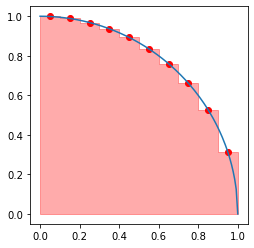

In [12]:
def h(x):
    return np.sqrt(1 - x * x)

X = np.linspace(0, 1, 11)
X = 0.5 * (X[:-1] + X[1:])
Y = h(X)

plt.plot(x, h(x))
plt.scatter(X, Y, color='r')
plt.fill_between(np.concatenate([[0], X, [1]]),
                 np.concatenate([Y[:1], Y, Y[-1:]]),
                 step='mid', color='r', alpha=0.33)
plt.gca().set_aspect('equal')

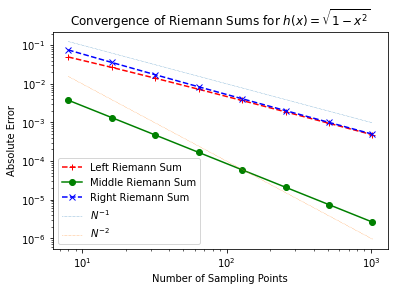

In [13]:
# Define a quarter circle function
def h(x):
    return np.sqrt(1 - x**2)

# Calculate errors for each Riemann sum type
err_l = [abs(RiemannSum(h, N, t='l') - np.pi / 4) for N in Ns]
err_m = [abs(RiemannSum(h, N, t='m') - np.pi / 4) for N in Ns]
err_r = [abs(RiemannSum(h, N, t='r') - np.pi / 4) for N in Ns]

# Plotting the convergence results
plt.loglog(Ns, err_l, '+--', color='r', label='Left Riemann Sum')
plt.loglog(Ns, err_m, 'o-',  color='g', label='Middle Riemann Sum')
plt.loglog(Ns, err_r, 'x--', color='b', label='Right Riemann Sum')
plt.loglog(Ns, Ns**(-1.0), ':', lw=0.5, label=r'$N^{-1}$')
plt.loglog(Ns, Ns**(-2.0), ':', lw=0.5, label=r'$N^{-2}$')
plt.xlabel('Number of Sampling Points')
plt.ylabel('Absolute Error')
plt.legend()
plt.title(r'Convergence of Riemann Sums for $h(x) = \sqrt{1 - x^2}$')
plt.show()

Although the specific error values vary across different functions, the general trends in convergence remain consistent.
Doubling the number of sampling points, or equivalently halving the step size, reduces the error in the left and right Riemann sums by roughly half.
By comparison, the middle Riemann sum achieves a fourfold reduction in error for each doubling of sampling points, indicating a faster rate of convergence.
This suggests that, overall, the middle Riemann sum converges more rapidly than the left and right sums.

As we move forward, we will adopt the notation and methods used in Numerical Recipes. These approaches will provide greater flexibility and accuracy, enabling us to tackle more complex integration problems more effectively.

In general, we observe that:
* For the left and right Riemann sums, doubling the number of sampling points halves the error. This is an example of **first-order convergence**.
* For the middle Riemann sum, doubling the number of sampling points reduces the error by a factor of four, indicating **second-order convergence**.

## Classical Formulas for Equally Spaced Abscissas

### Trapezoidal Rule

To improve our numerical integration, we will transition from the Riemann sum approach to the **trapezoidal rule**.
From now on, we'll adopt a "vertex" formulation for points, where $x_i = a + i \Delta x$ and $\Delta x = (b - a)/N$.

The trapezoidal rule approximates the area under a curve by treating each segment as a trapezoid.
For a single interval $[x_0, x_1]$, we approximate:
\begin{align}
\int_{x_0}^{x_1} f(x) \, dx \approx h \left( \frac{1}{2} f(x_0) + \frac{1}{2} f(x_1) \right) + \mathcal{O}(h^3 f'')
\end{align}
where $h = x_1 - x_0$.
This error term indicates that the true value differs by an amount proportional to $h^3$ and $f''$, making it second-order accurate.
If $f$ is linear (i.e., $f'' = 0$), the trapezoidal approximation is exact.

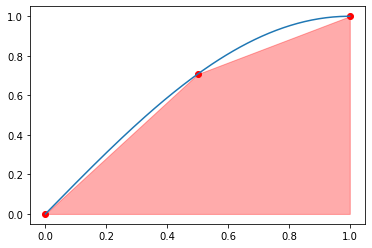

In [14]:
# Test with different functions, this is a quarter circle

X = np.linspace(0, 1, 3)
Y = g(X)

plt.plot(x, g(x))
plt.scatter(X, Y, color='r')
plt.fill_between(X, g(X), color='r', alpha=0.33)

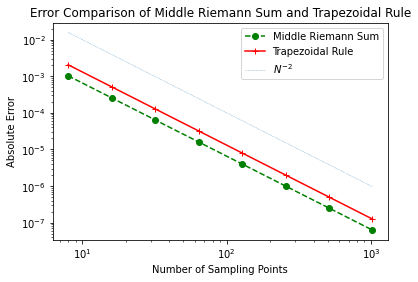

In [15]:
# Trapezoidal rule implementation
def trapezoidal(f, N=8, a=0, b=1):
    X, D = np.linspace(a, b, N+1, retstep=True)
    return np.sum(f(X[1:]) + f(X[:-1])) * 0.5 * D

# Compare errors of middle Riemann sum and trapezoidal rule
err_m = [abs(RiemannSum(g, N, t='m') - 2 / np.pi) for N in Ns]
err_t = [abs(trapezoidal(g, N) - 2 / np.pi) for N in Ns]

plt.loglog(Ns, err_m, 'o--', color='g', label='Middle Riemann Sum')
plt.loglog(Ns, err_t, '+-',  color='r', label='Trapezoidal Rule')
plt.loglog(Ns, Ns**(-2.0), ':', lw=0.5, label=r'$N^{-2}$')
plt.xlabel('Number of Sampling Points')
plt.ylabel('Absolute Error')
plt.legend()
plt.title('Error Comparison of Middle Riemann Sum and Trapezoidal Rule')
plt.show()

### Simpson's Rule

The trapezoidal rule is exact for linear functions.
Naturally, we may wonder if there's a method exact for quadratic functions.
This leads us to Simpson's Rule.

Simpson's rule approximates the integral over two intervals $[x_0, x_2]$ by fitting a quadratic polynomial.
This yields:
\begin{align}
\int_{x_0}^{x_2} f(x) \, dx \approx h \left( \frac{1}{3} f(x_0) + \frac{4}{3} f(x_1) + \frac{1}{3} f(x_2) \right) + \mathcal{O}(h^5 f^{(4)})
\end{align}
where $h = \frac{x_2 - x_0}{2}$ and $x_1 = \frac{x_0 + x_2}{2}$.
This error term indicates that Simpson's Rule is fourth-order accurate---even when using quadratic approximations, we achieve convergence as though we were using fourth-degree terms.

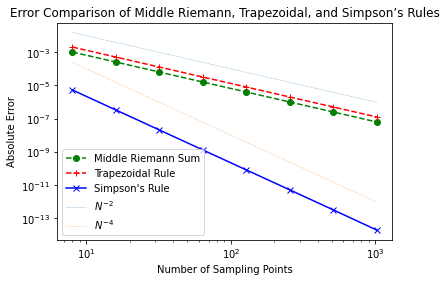

In [16]:
# Simpson's rule implementation
def simpson(f, N=8, a=0, b=1):
    X, D = np.linspace(a, b, N+1, retstep=True)
    S = 0
    for i in range(N // 2):
        l = X[2 * i]
        m = X[2 * i + 1]
        r = X[2 * i + 2]
        S += D * (f(l) + 4 * f(m) + f(r)) / 3
    return S

# Compare errors of middle Riemann, trapezoidal, and Simpson's rule
err_S = [abs(simpson(g, N) - 2 / np.pi) for N in Ns]

plt.loglog(Ns, err_m, 'o--', color='g', label='Middle Riemann Sum')
plt.loglog(Ns, err_t, '+--', color='r', label='Trapezoidal Rule')
plt.loglog(Ns, err_S, 'x-',  color='b', label="Simpson's Rule")
plt.loglog(Ns, Ns**(-2.0), ':', lw=0.5, label=r'$N^{-2}$')
plt.loglog(Ns, Ns**(-4.0), ':', lw=0.5, label=r'$N^{-4}$')
plt.xlabel('Number of Sampling Points')
plt.ylabel('Absolute Error')
plt.legend()
plt.title('Error Comparison of Middle Riemann, Trapezoidal, and Simpson’s Rules')
plt.show()

### Bode's Rule

Simpson's rule is exact for quadratic polynomials, but what if we want a rule that is exact for quartic polynomials?
Bode's Rule addresses this, using a polynomial fit across four intervals to achieve even higher accuracy.

Bode's rule integrates over four intervals, providing an approximation that is exact for polynomials up to degree four:
\begin{align}
\int_{x_0}^{x_4} f(x) , dx \approx h \left( \frac{14}{45} f(x_0) + \frac{64}{45} f(x_1) + \frac{24}{45} f(x_2) + \frac{64}{45} f(x_3) + \frac{14}{45} f(x_4) \right) + \mathcal{O}(h^7 f^{(6)})
\end{align}
where $h = (x_4 - x_0)/4$.
This method is sixth-order accurate, meaning it converges more quickly than Simpson's Rule for smooth functions.

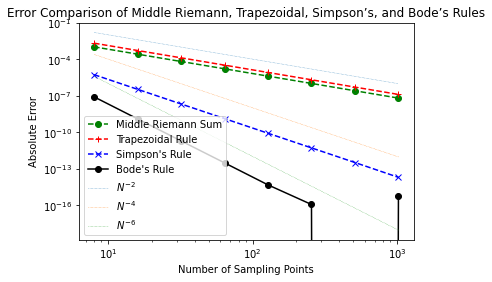

In [17]:
# Bode's rule implementation
def bode(f, N=8, a=0, b=1):
    X, D = np.linspace(a, b, N+1, retstep=True)
    S = 0
    for i in range(N // 4):
        x0 = X[4 * i]
        x1 = X[4 * i + 1]
        x2 = X[4 * i + 2]
        x3 = X[4 * i + 3]
        x4 = X[4 * i + 4]
        S += D * (14 * f(x0) + 64 * f(x1) + 24 * f(x2) + 64 * f(x3) + 14 * f(x4)) / 45
    return S

# Compare errors of middle Riemann, trapezoidal, Simpson's, and Bode's rule
err_B = [abs(bode(g, N) - 2 / np.pi) for N in Ns]

plt.loglog(Ns, err_m, 'o--',  color='g',  label='Middle Riemann Sum')
plt.loglog(Ns, err_t, '+--',  color='r',  label='Trapezoidal Rule')
plt.loglog(Ns, err_S, 'x--',  color='b',  label="Simpson's Rule")
plt.loglog(Ns, err_B, 'o-',   color='k',  label="Bode's Rule")
plt.loglog(Ns, Ns**(-2.0), ':', lw=0.5, label=r'$N^{-2}$')
plt.loglog(Ns, Ns**(-4.0), ':', lw=0.5, label=r'$N^{-4}$')
plt.loglog(Ns, Ns**(-6.0), ':', lw=0.5, label=r'$N^{-6}$')
plt.xlabel('Number of Sampling Points')
plt.ylabel('Absolute Error')
plt.legend()
plt.title('Error Comparison of Middle Riemann, Trapezoidal, Simpson’s, and Bode’s Rules')
plt.show()

## Using Scipy and Sympy

Instead of implementing our own numerical schemes, in real research projects, it is more likely that you will use a state-of-art integrator from a well maintained package.

For numerical integration, `scipy` has a recently collection of integrators.

For symbolic integration, `sympy` is the standard choice.

In [18]:
# Scipy example for numerical integration

from scipy.integrate import quad

res, err = quad(lambda x: np.sqrt(1 - x * x), 0, 1)

print('Result:', res)
print('Error: ', err)

Result: 0.7853981633974481
Error:  8.833911380179416e-11


In [19]:
# Sympy example for symbolic integration

from sympy import Symbol, integrate, sqrt

x = Symbol('x')

integrate(sqrt(1 - x * x), x)

x*sqrt(1 - x**2)/2 + asin(x)/2

In [20]:
integrate(sqrt(1 - x * x), (x, 0, 1))

pi/4

## Final comments

* Based on the previous examples, by increasing the order of the approximations, it is possible to construct numerical integration that converges very rapidly.

* For double precision floating point values, the machine accruacy is $\sim 10^{-16}$.  We saw with Bode's rule, we are already reaching that limit for $\sim 256$ sampling points.

* In practice, for smooth functions, it is even possible to develop numerical integrators that converge exponentially!  E.g., Gaussian quadrature used in scipy.

* Symbolic integration provided by, e.g., sympy, can also be a useful tool.

* However, if the function is not smooth, i.e., with discontinuity, then formally the convergent rate is only first order.  Hence, refining the sampling points near the discontinuity is the only method to provide accurate integration.

* Also, the approximations we introduce in this lecture includes the *end points* of the function.  It will be difficult to apply these numerical methods to, e.g., improper integral, or functions with singularity.

* For the assignment that we will do in two weeks, we will learn how to modify our integrators to exclude the end points, and use them for improper integral and functions with singularity.